In [ ]:
# Based on
# https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.2-understanding-recurrent-neural-networks.ipynb

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

Populating the interactive namespace from numpy and matplotlib


In [2]:
# https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)

# each review is encoded as a sequence of word indexes
# indexed by overall frequency in the dataset
# output is 0 (negative) or 1 (positive) 
imdb = tf.keras.datasets.imdb.load_data(num_words=max_features)
(raw_input_train, y_train), (raw_input_test, y_test) = imdb

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences

input_train = tf.keras.preprocessing.sequence.pad_sequences(raw_input_train, maxlen=maxlen)
input_test = tf.keras.preprocessing.sequence.pad_sequences(raw_input_test, maxlen=maxlen)

17464789/17464789 [==============================] - 2s 0us/step


## GRU RNNs

In [3]:
from tensorflow.keras.layers import GRU, Embedding, Bidirectional

embedding_dim = 32

model = keras.Sequential()

# encoder
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(GRU(units=32))

# latent space
model.add(tf.keras.layers.Dense(name='fc', units=32, activation='relu'))

# binary classifier as decoder
model.add(tf.keras.layers.Dense(name='classifier', units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 fc (Dense)                  (None, 32)                1056      
                                                                 
 classifier (Dense)          (None, 1)                 33        
                                                                 
Total params: 327,425
Trainable params: 327,425
Non-trainable params: 0
_________________________________________________________________


In [4]:
batch_size = 1000

%time history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 11s 234ms/step - loss: 0.6883 - accuracy: 0.5736 - val_loss: 0.6805 - val_accuracy: 0.6038
Epoch 2/10
20/20 [==============================] - 5s 233ms/step - loss: 0.6486 - accuracy: 0.6858 - val_loss: 0.6200 - val_accuracy: 0.6708
Epoch 3/10
20/20 [==============================] - 4s 187ms/step - loss: 0.4960 - accuracy: 0.7801 - val_loss: 0.4364 - val_accuracy: 0.8162
Epoch 4/10
20/20 [==============================] - 3s 149ms/step - loss: 0.3310 - accuracy: 0.8580 - val_loss: 0.3744 - val_accuracy: 0.8392
Epoch 5/10
20/20 [==============================] - 3s 132ms/step - loss: 0.2373 - accuracy: 0.9090 - val_loss: 0.3502 - val_accuracy: 0.8510
Epoch 6/10
20/20 [==============================] - 4s 174ms/step - loss: 0.1774 - accuracy: 0.9392 - val_loss: 0.3411 - val_accuracy: 0.8688
Epoch 7/10
20/20 [==============================] - 3s 158ms/step - loss: 0.1469 - accuracy: 0.9508 - val_loss: 0.3644 - val_accuracy: 0.8622
Epoch

In [5]:
train_loss, train_accuracy = model.evaluate(input_train, y_train, batch_size=batch_size)
train_accuracy

25/25 [==============================] - 0s 16ms/step - loss: 0.1415 - accuracy: 0.9605


0.9604799747467041

In [6]:
test_loss, test_accuracy = model.evaluate(input_test, y_test, batch_size=batch_size)
test_accuracy

25/25 [==============================] - 0s 17ms/step - loss: 0.4639 - accuracy: 0.8505


0.8504800200462341

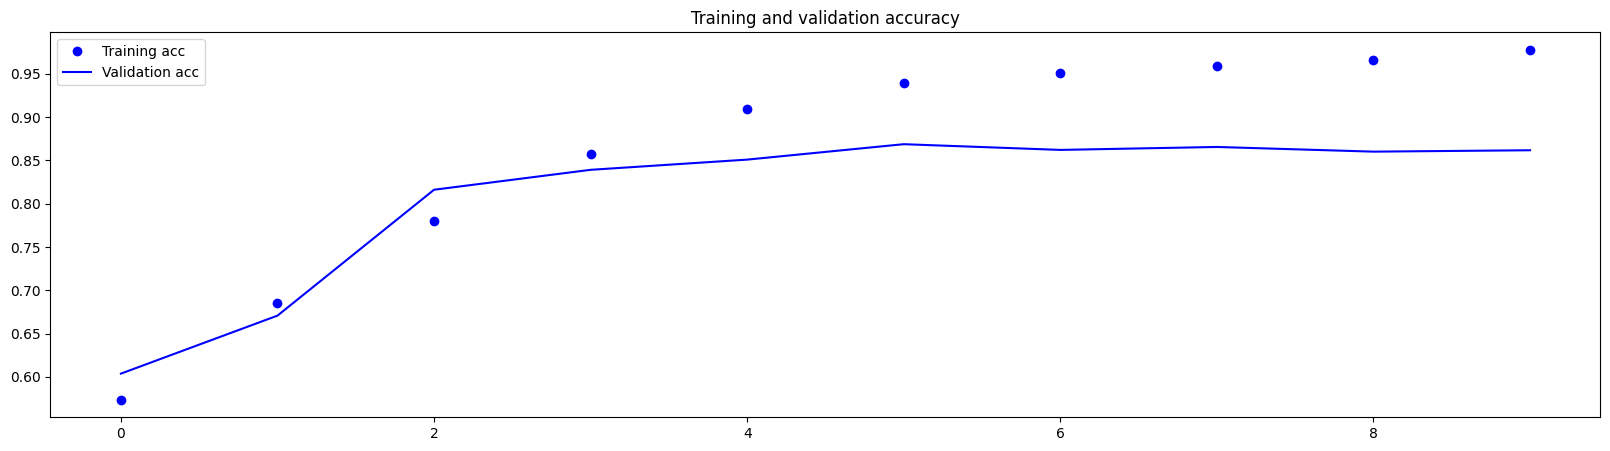

In [9]:
def plot_history(history, samples=10, init_phase_samples=None):
    epochs = history.params['epochs']
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    every_sample =  int(epochs / samples)
    acc = pd.DataFrame(acc).iloc[::every_sample, :]
    val_acc = pd.DataFrame(val_acc).iloc[::every_sample, :]

    fig, ax = plt.subplots(figsize=(20,5))

    ax.plot(acc, 'bo', label='Training acc')
    ax.plot(val_acc, 'b', label='Validation acc')
    ax.set_title('Training and validation accuracy')
    ax.legend()

plot_history(history)

In [10]:
# precition
model.predict(input_test[0:5])

1/1 [==============================] - 1s 641ms/step


array([[0.80571085],
       [0.9965    ],
       [0.9240794 ],
       [0.15011756],
       [0.99939764]], dtype=float32)

In [11]:
# ground truth
y_test[0:5]

array([0, 1, 1, 0, 1])